# Data Normalization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

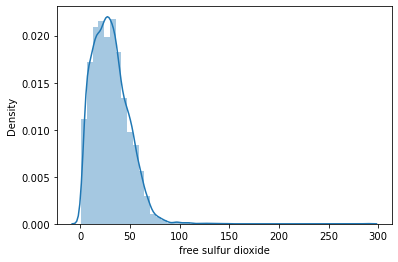

In [5]:
sns.distplot(df['free sulfur dioxide'])

## Max absolute scaling

# value / max_value

In [7]:
df_temp = df.copy()

In [8]:
df_temp['free sulfur dioxide'] = df_temp['free sulfur dioxide'] / df_temp['free sulfur dioxide'].abs().max()

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

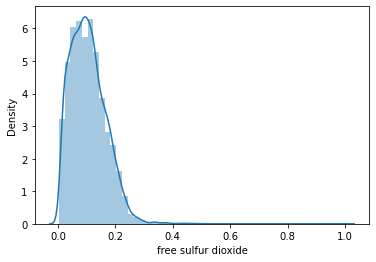

In [9]:
sns.distplot(df_temp['free sulfur dioxide'])

In [10]:
df_temp['alcohol'] = df_temp['alcohol'] / df_temp['alcohol'].abs().max()

# original_value = scaled_value * max

## Min-Max Scaling

## (value - min) / (max - min)

In [13]:
df_temp = df.copy()

# original_value = scaled_value * (max-min) + min

### Log Transformation

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

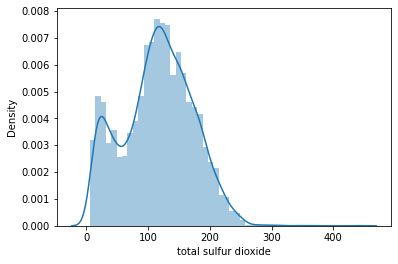

In [27]:
sns.distplot(df['total sulfur dioxide'])

In [28]:
df_temp = df.copy()

In [30]:
df_temp['total sulfur dioxide'] = np.log(df_temp['total sulfur dioxide']+1)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

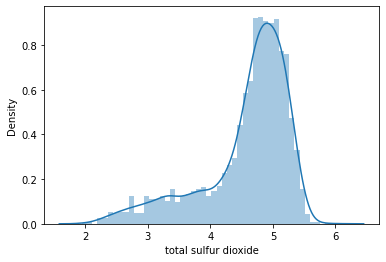

In [32]:
sns.distplot(df_temp['total sulfur dioxide'])

## Standardization of Data

In [ ]:
## z-score method
# scaled_value = value - mean / std

In [ ]:
# original_value = scaled_value * std + mean

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

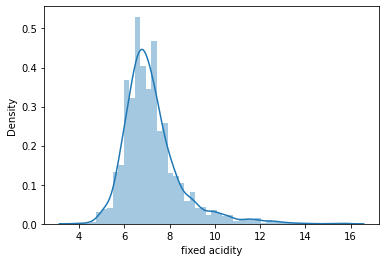

In [40]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

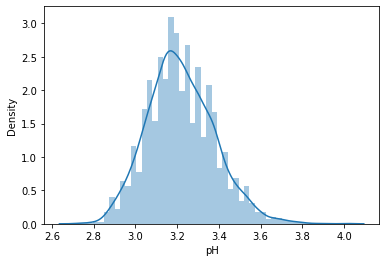

In [39]:
sns.distplot(df['pH'])

In [41]:
scaled_data = df.copy()

In [42]:
## apply the formula
for col in ['fixed acidity', 'pH']:
    scaled_data[col] = (scaled_data[col] - scaled_data[col].mean()) / scaled_data[col].std()

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

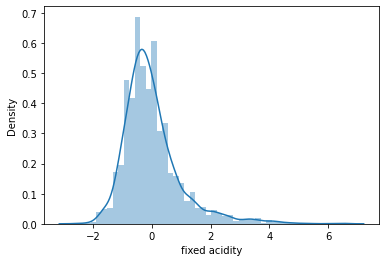

In [43]:
sns.distplot(scaled_data['fixed acidity'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

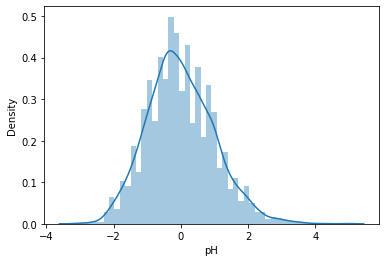

In [44]:
sns.distplot(scaled_data['pH'])

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [47]:
sc.fit(df[['pH']])

StandardScaler()

In [48]:
sc_data = sc.transform(df[['pH']])

In [54]:
sc_data = sc_data.reshape(-1)

<AxesSubplot:xlabel='pH', ylabel='Density'>

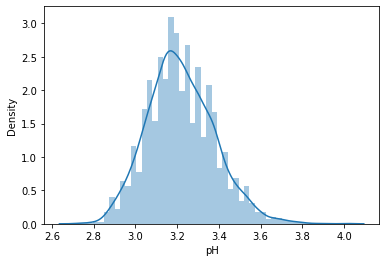

In [56]:
sns.distplot(df['pH'])

<AxesSubplot:ylabel='Density'>

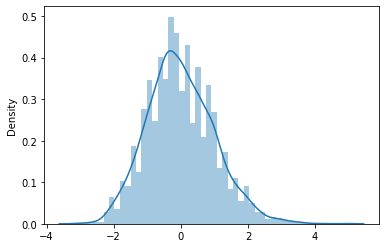

In [55]:
sns.distplot(sc_data)